In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filename in os.walk('/kaggle/input'):
  for filesname in filesnames:
    print(os.path.join(dirname, filename))

In [ ]:
import os
import pandas as pd
import warnings
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/My Drive/CancerDataset

/content/drive/My Drive/CancerDataset


In [ ]:
data =pd.read_excel("cancer patient data sets.xlsx")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
data.shape

(1000, 25)

In [ ]:
data

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


# **Removing PatientID from the database**

In [ ]:
data = data.drop('Patient Id', axis = 1)
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


# **Checking For Null Values (If there are any)**

In [ ]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# **Applying Label Encoder in Column 'Level'**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
encoded_level = le.fit_transform(data['Level'])

In [ ]:
encoded_level

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
encoded_level_df = pd.DataFrame(encoded_level)

# **Replacing old "Level" coumn with new one**

In [ ]:
data = data.drop('Level', axis = 1)
data = pd.concat([data,encoded_level_df], axis = 1)

In [ ]:
data.columns

Index([                     'Age',                   'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',                          0],
      dtype='object')

In [ ]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,0
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,0
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,0
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


In [ ]:
data.columns=[              'Age',                   'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',                          'Level']

# **Dividing the features and the target**

In [ ]:
x = data.iloc[:,:23]
y = data['Level']

# **Splitting the data for training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

# **Fitting the data in a classifier (Logistic Regression)**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

# **Classification Report Of Our Model**

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       0.97      0.99      0.98        70
           2       0.99      0.97      0.98        79

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



# **LIGHTGBM**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os
for dirname, _, filenames in os.walk(r"cancer patient data sets.xlsx"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [ ]:
data['Gender'].value_counts()

1    598
2    402
Name: Gender, dtype: int64

In [ ]:
data['chronic Lung Disease'].value_counts()

6    308
2    173
4    141
3    141
7    107
5     80
1     50
Name: chronic Lung Disease, dtype: int64

In [ ]:
X = data[['Air Pollution','Gender','chronic Lung Disease','Smoking','Dry Cough']]
y = data['Level']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 5
[LightGBM] [Info] Start training from score -1.002004
[LightGBM] [Info] Start training from score -1.232960
[LightGBM] [Info] Start training from score -1.074617
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

LGBMClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 1.0000


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
    objective='binary',
    metric='binary_logloss',
    random_state=42
)

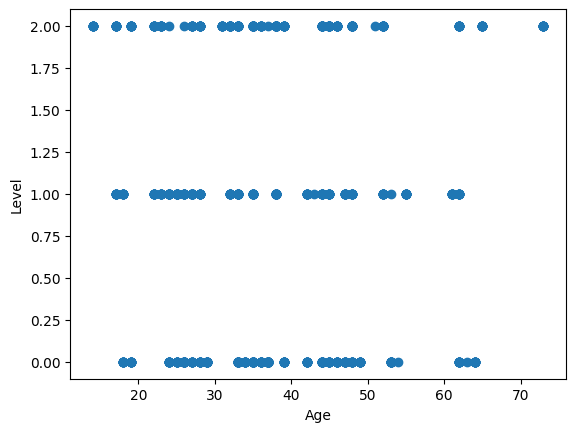

In [ ]:
fig , ax = plt.subplots()
ax.scatter(  data['Age'],data['Level'])
ax.set_xlabel("Age")
ax.set_ylabel("Level")
sns.set_palette('rocket')
plt.show()

<Axes: xlabel='Level', ylabel='count'>

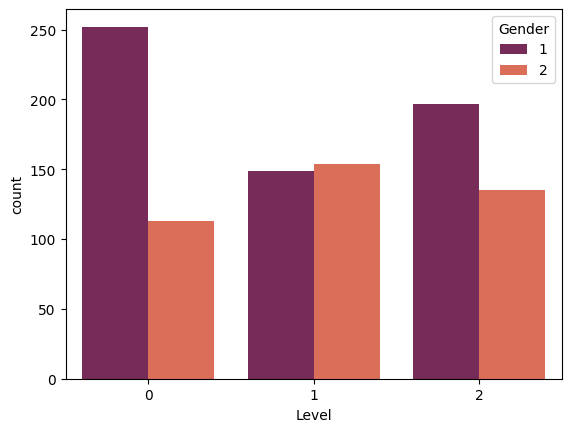

In [ ]:
sns.countplot(data=data, x="Level", hue="Gender", palette= 'rocket')

<Axes: >

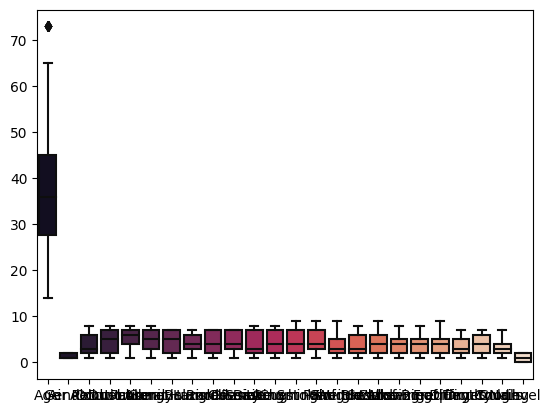

In [ ]:
plt.subplots()
sns.boxplot(data, palette= 'rocket')

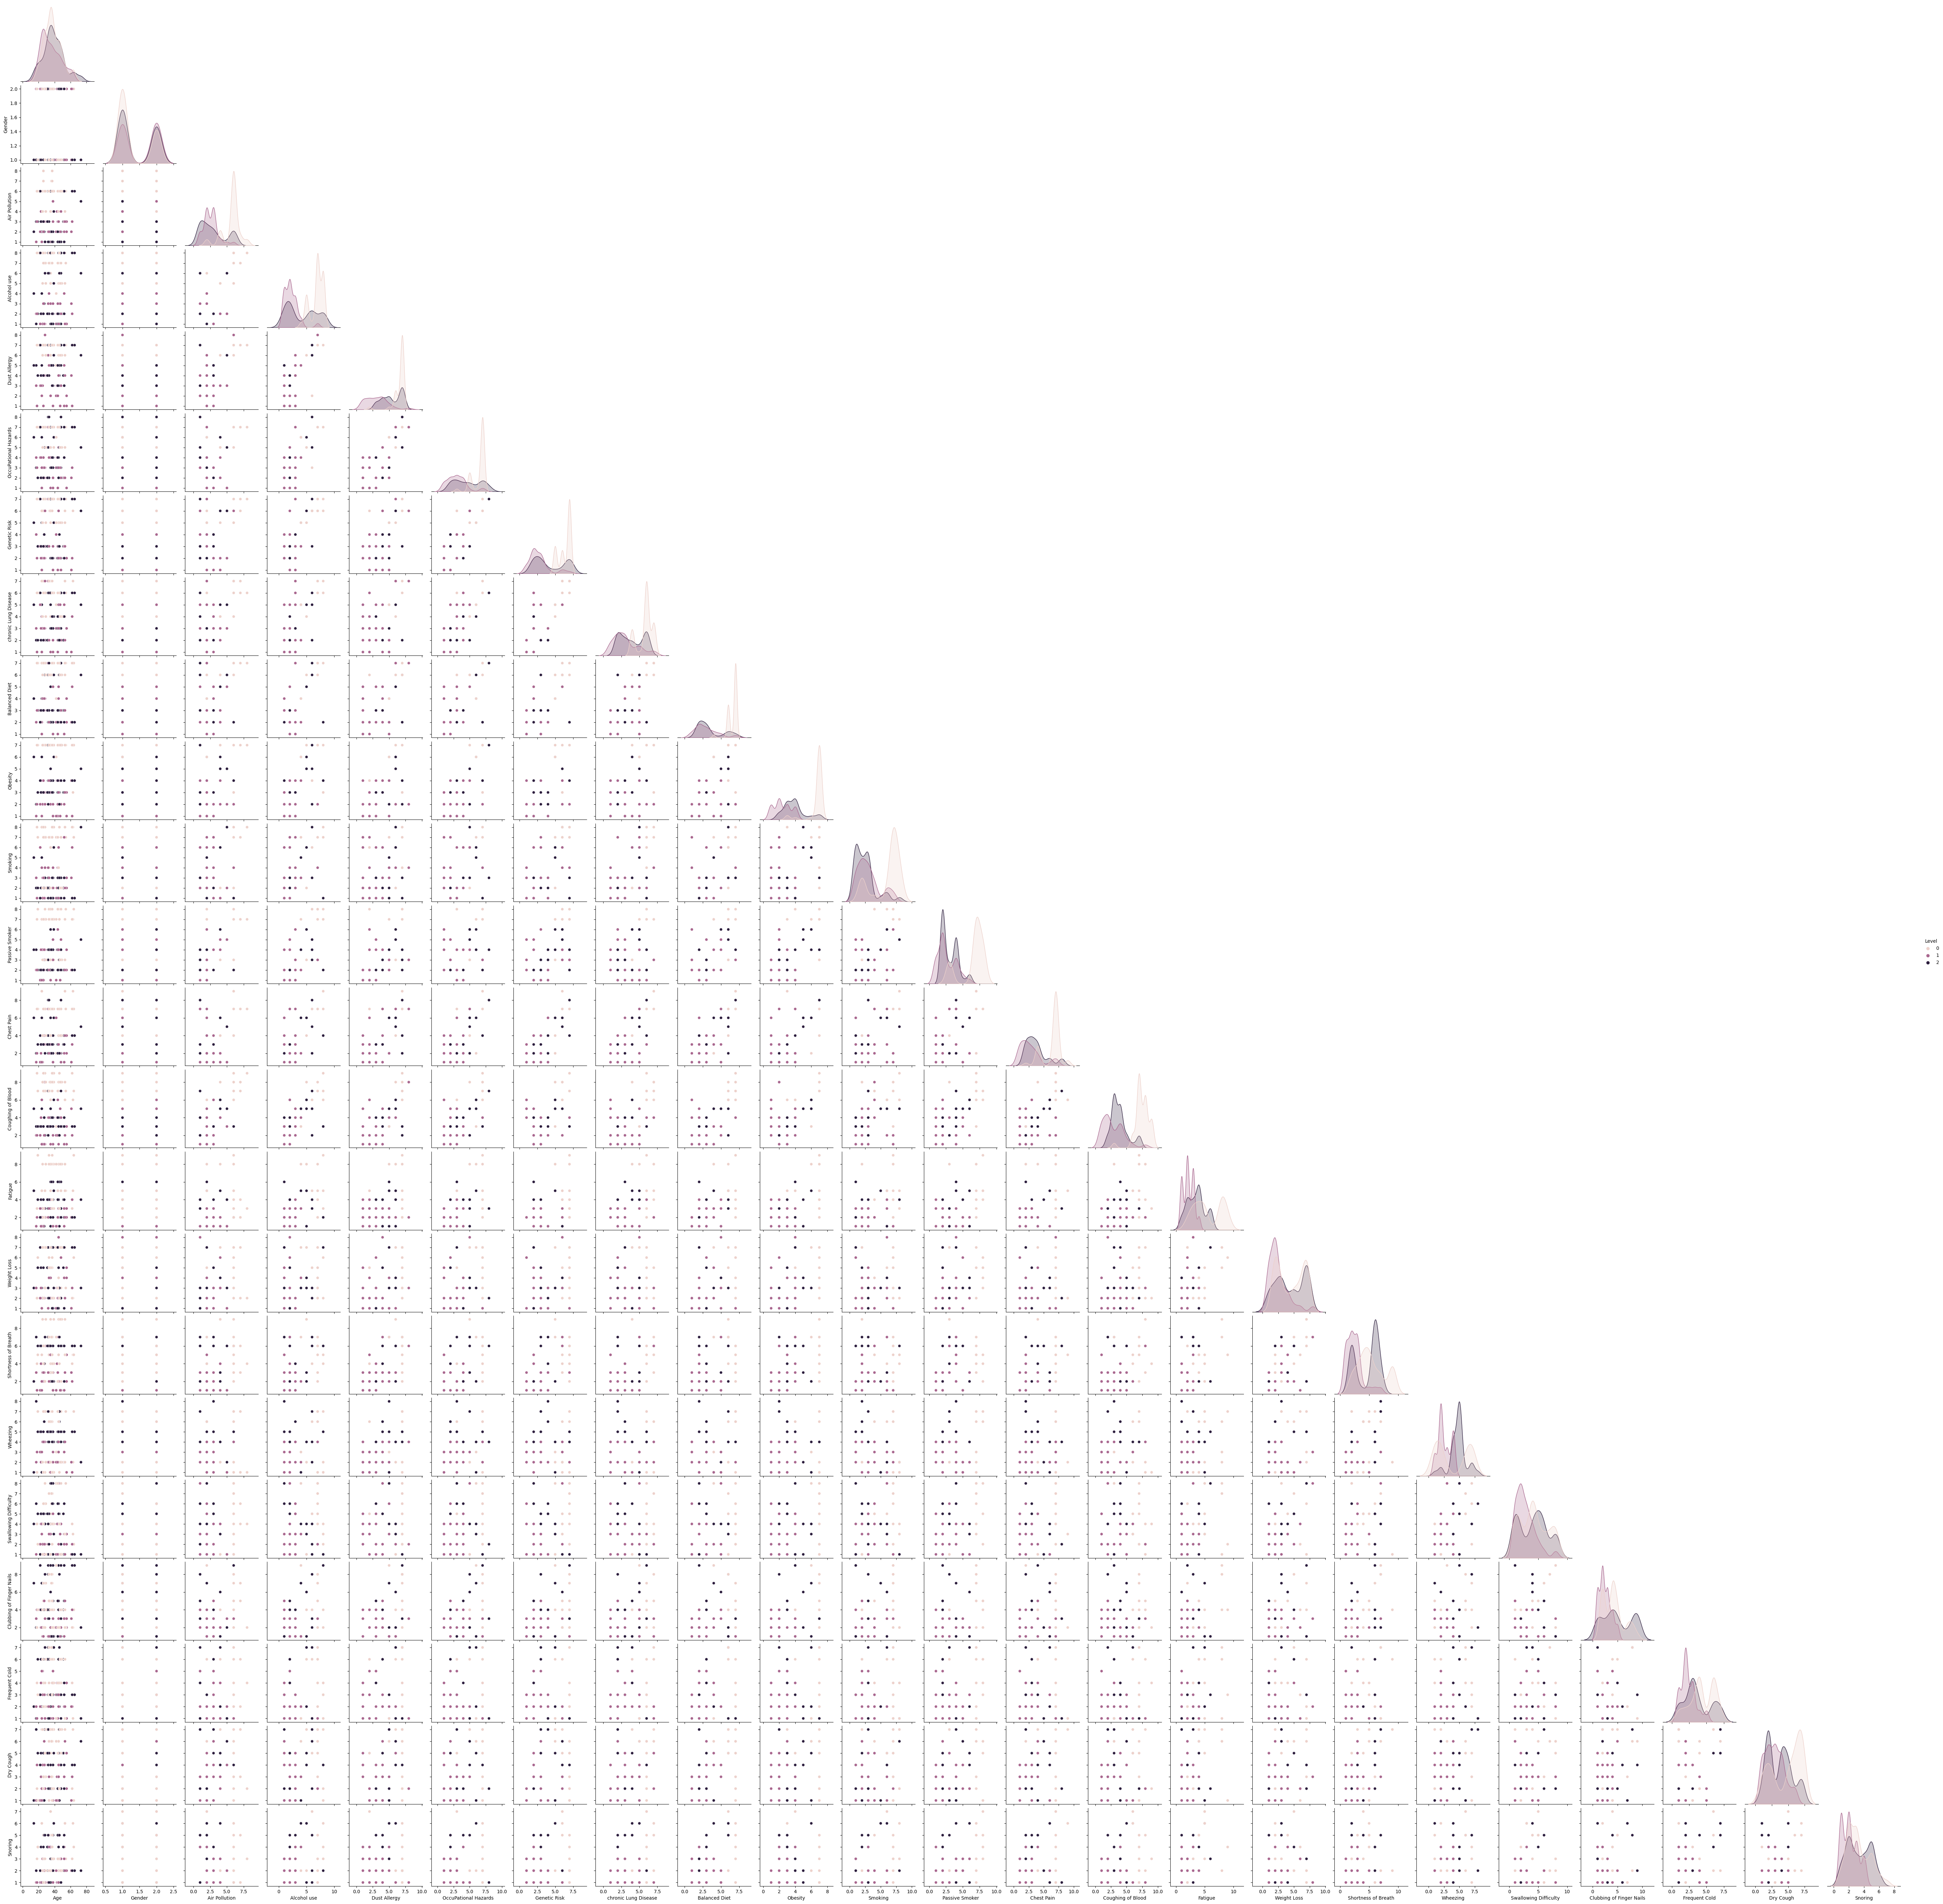

In [ ]:
sns.pairplot(data, hue='Level', corner=True)